# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [53]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

In [54]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [55]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 2010 to 2016
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighborhood         397 non-null    object 
 1   sale_price_sqr_foot  392 non-null    float64
 2   housing_units        397 non-null    int64  
 3   gross_rent           397 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.5+ KB


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [56]:
# Calculate the mean number of housing units per year (hint: use groupby)
# Refresh on Pandas.Series Attributes(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) 
units_per_year=sfo_data.groupby(sfo_data.index).mean()
peryearsold=units_per_year['housing_units']
units_per_year

,sale_price_sqr_foot,housing_units,gross_rent
year,,,
2010,369.344353,372560,1239
2011,341.903429,374507,1530
2012,399.389968,376454,2324
2013,483.600304,378401,2971
2014,556.277273,380348,3528
2015,632.540352,382295,3739
2016,697.643709,384242,4390


In [57]:
# Save the dataframe as a csv file
peryearsold.to_csv('peryearsold.csv',header=True)

<AxesSubplot:title={'center':"Housing Units in San Fransisco from 10'-16'"}, xlabel='Year', ylabel='Units Sold'>

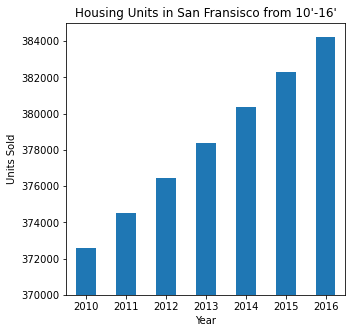

In [58]:
# Use the Pandas plot function to plot the average housing units per year.
peryearsold.plot.bar(ylim=(370000,385000)
                    , title='Housing Units in San Fransisco from 10\'-16\''
                    , ylabel= "Units Sold"
                    , xlabel='Year'
                    , rot=0
                    , grid=False
                    , figsize=(5,5)
                    )
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [59]:
# Calculate the average sale price per square foot and average gross rent
avghousingdf=units_per_year.drop(columns='housing_units')
avghousingdf

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


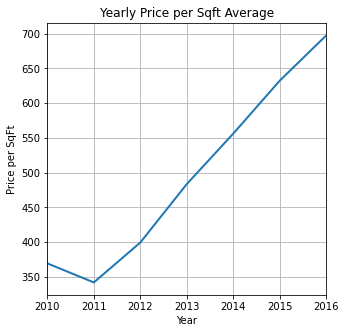

In [60]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent
saleplot=avghousingdf['sale_price_sqr_foot'].plot.line(
                     title='Yearly Price per Sqft Average'
                    , ylabel='Price per SqFt'
                    , xlabel='Year'
                    , rot=0
                    , lw=2
                    , grid=True
                    , figsize=(5,5)
                    , xlim=(2010,2016)
                                        )
# Line chart for average sale price per square foot
# YOUR CODE HERE!


# Line chart for average montly rent

             

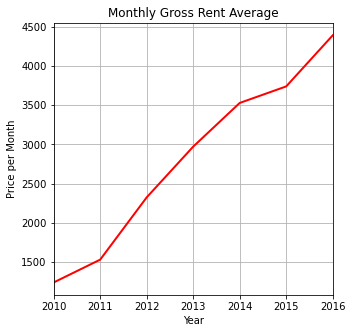

In [61]:
rentplot=avghousingdf['gross_rent'].plot.line(title='Monthly Gross Rent Average'
                    , ylabel='Price per Month'
                    , xlabel='Year'
                    , rot=0
                    , grid=True
                    , lw=2
                    , figsize=(5,5)
                    , color='r'
                    , xlim=(2010,2016))

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [62]:
# Group by year and neighborhood and then create a new dataframe of the mean values
year_neighborhood=sfo_data.groupby(['year','neighborhood']).mean()
yearly_neighborhood=year_neighborhood.drop(columns='housing_units')
yearly_neighborhood.dropna().head(10)

sale_price_sqr_foot  gross_rent
year neighborhood                                     
2010 Alamo Square               291.182945        1239
     Anza Vista                 267.932583        1239
     Bayview                    170.098665        1239
     Buena Vista Park           347.394919        1239
     Central Richmond           319.027623        1239
     Central Sunset             418.172493        1239
     Corona Heights             369.359338        1239
     Cow Hollow                 569.379968        1239
     Croker Amazon              165.645730        1239
     Diamond Heights            456.930822        1239

In [63]:
# Use hvplot to create an interactive line chart of the average price per sqft.
# The plot should have a dropdown selector for the neighborhood
# YOUR CODE HERE!
yearly_neighborhood.hvplot.line(
      y='sale_price_sqr_foot'
    , x='year'
    , subplots=False
    # by='year'
    , groupby=['neighborhood']
    , ylim=(0,2500)
    , dynamic=False
    , height=500
    , hover_cols='one')


:HoloMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [64]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
yearly_neighborhood.hvplot.line(
      y='gross_rent'
    , x='year'
    , subplots=False
    # by='year'
    , groupby=['neighborhood']
    , ylim=(0,5000)
    , xlim=('2010','2017')
    , dynamic=False
    , height=500
    , hover_cols='one')

:HoloMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [65]:
# Getting the data from the top 10 expensive neighborhoods to own
top10owned=yearly_neighborhood.groupby('neighborhood').mean().sort_values('sale_price_sqr_foot',ascending=False).head(10).drop(columns='gross_rent')
top10owned



,sale_price_sqr_foot
neighborhood,
Union Square District,903.993258
Merced Heights,788.844818
Miraloma Park,779.810842
Pacific Heights,689.555817
Westwood Park,687.087575
Telegraph Hill,676.506578
Presidio Heights,675.350212
Cow Hollow,665.964042
Potrero Hill,662.013613


In [66]:
# Plotting the data from the top 10 expensive neighborhoods
top10owned.hvplot(kind='bar',color='blue',rot=90,title='Top 10 Expensive Neighborhoods in SFO',ylabel='Avg. Sale Price Per Sqft',x='neighborhood',ylim=(600,900))


:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [67]:
# Group by year and neighborhood and then create a new dataframe of the mean values
#year_neighborhood=sfo_data.groupby(['neighborhood','year']).mean()
#yearly_neighborhood=year_neighborhood.drop(columns='housing_units')
#yearly_neighborhood.dropna().head(10)
#year_neighborhood.head()
##_______
#df_expensive_n##_____

#lis3=top10owned.index.to_list()
#df_expensive_neighborhoods_per_year = year_neighborhood[year_neighborhood['neighborhood'].isin(top10owned.index)]
#df_expensive_neighborhoods_per_year.head()
#year_neighborhood.hvplot(groupby='neighborhood',y=('gross_rent','sale_price_sqr_foot'),dynamic=False)

In [68]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# Plotting the data from the top 10 expensive neighborhoodsin
top10yearly = sfo_data[sfo_data["neighborhood"].isin(top10owned.index)].drop(columns='housing_units')
top10yearly.hvplot(kind='bar',color='blue',rot=90,title='Top 10 Expensive Neighborhoods in SFO',ylabel='Avg Price SQFT/ Monthly Rent',x='year',y=(['sale_price_sqr_foot','gross_rent']),groupby='neighborhood',dynamic=False)


:HoloMap   [neighborhood]
   :Bars   [year,Variable]   (value)

In [69]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
# Plotting the data from the top 10 expensive neighborhoodsin


In [70]:
# Plotting the data from the top 10 expensive neighborhoodsin




- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [71]:
# Load neighborhoods coordinates data
filepath=Path('Data/neighborhoods_coordinates.csv')
data=pd.read_csv(filepath,index_col='Neighborhood')

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [72]:
# Calculate the mean values for each neighborhood
plotdata=sfo_data.groupby(['neighborhood']).mean()

In [73]:
# Join the average values with the neighborhood locations
plotdata=pd.concat([plotdata,data],axis='columns',join='outer')
plotdata.reset_index(inplace=True)
plotdata


 


,index,sale_price_sqr_foot,housing_units,gross_rent,Lat,Lon
0,Alamo Square,366.020712,378401.0,2817.285714,37.791012,-122.402100
1,Anza Vista,373.382198,379050.0,3031.833333,37.779598,-122.443451
2,Bayview,204.588623,376454.0,2318.400000,37.734670,-122.401060
3,Bayview Heights,590.792839,382295.0,3739.000000,37.728740,-122.410980
4,Bernal Heights,576.746488,379374.5,3080.333333,NaN,NaN
...,...,...,...,...,...,...
72,Yerba Buena,576.709848,377427.5,2555.166667,37.792980,-122.396360
73,Bernal Heights,NaN,NaN,NaN,37.728630,-122.443050
74,Downtown,NaN,NaN,NaN,37.791010,-122.402100
75,Ingleside,NaN,NaN,NaN,37.721161,-122.487068


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [75]:
plotdata=plotdata.dropna()


In [77]:

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
map_box = px.scatter_mapbox(
    plotdata,
    lat="Lat",
    lon="Lon",
    size="gross_rent",
    color="index",
    zoom=10
)
map_box.update_layout(
    mapbox_style="streets")
map_box.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [110]:
# Fetch the data from all expensive neighborhoods per year.
top10yearly = sfo_data[sfo_data["neighborhood"].isin(top10owned.index)]
top=top10yearly.groupby('neighborhood').mean().reset_index()


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [111]:
# Parallel Categories Plot
px.parallel_coordinates(top,color=top.index, width = 1000, height = 500)

In [112]:
# Parallel Coordinates Plot
px.parallel_categories(top,color='sale_price_sqr_foot',)

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [29]:
# Sunburst Plot
sunburstdata=top10yearly.reset_index()
#pxpx.sunburst(sunburstdata,names='index',parents='neighborhood',values='sale_price_sqr_foot')
px.sunburst(sunburstdata,path=['year','neighborhood'],values='sale_price_sqr_foot',color='gross_rent',color_continuous_scale='RdBu'
)